In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 130.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [2]:
!pip install ruamel_yaml


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 31.6 MB/s eta 0:00:00


In [3]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chod 600 ~/.kaggle/kaggle.json

/bin/bash: line 1: chod: command not found


In [4]:
!pip install opendatasets

In [5]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/shlokraval/ppe-dataset-yolov8")

Dataset URL: https://www.kaggle.com/datasets/shlokraval/ppe-dataset-yolov8


100%|██████████| 2.35G/2.35G [00:11<00:00, 222MB/s]



image 1/1 /content/ppe-dataset-yolov8/train/images/-1-_png_jpg.rf.56fbd1be279af0461735d8dc2d7e357f.jpg: 640x640 1 person, 1 refrigerator, 7.9ms
Speed: 9.1ms preprocess, 7.9ms inference, 366.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


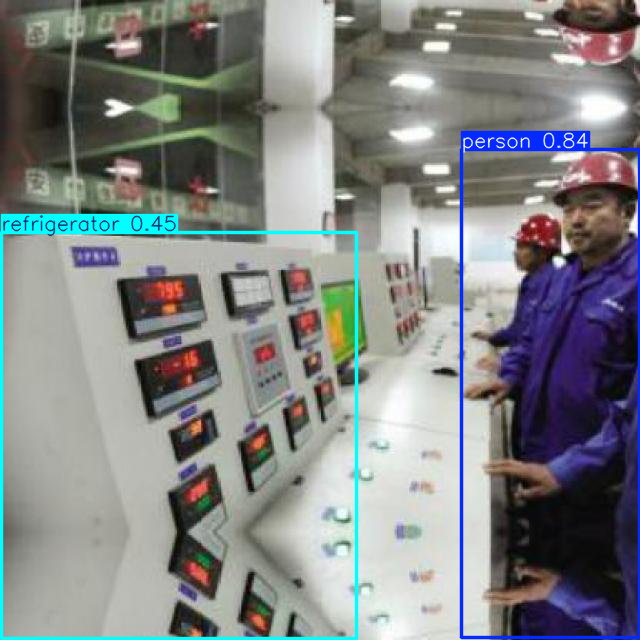

In [8]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')
result = model('/content/ppe-dataset-yolov8/train/images/-1-_png_jpg.rf.56fbd1be279af0461735d8dc2d7e357f.jpg', conf=0.25, save=True)
result[0].show()

In [29]:

import sys
import ruamel.yaml

yaml = ruamel.yaml.YAML()

# yaml.prserve_quotes = True
with open('/content/ppe-dataset-yolov8/data.yaml') as fp:
  data = yaml.load(fp)
  # Correct the paths to the image directories
  data['train'] = "/content/ppe-dataset-yolov8/train/images"
  data['test'] = "/content/ppe-dataset-yolov8/test/images"
  data['val'] = "/content/ppe-dataset-yolov8/valid/images"

  print(data['train'])
  print(data['test'])
  print(data['val'])

  # save the files
  with open('data.yaml', 'w') as fp :
    yaml.dump(data, fp)

/content/ppe-dataset-yolov8/train/images
/content/ppe-dataset-yolov8/test/images
/content/ppe-dataset-yolov8/valid/images


In [33]:
model = YOLO('yolov8n.pt')

results = model.train(data="data.yaml", epochs=1, imgsz=640)

Ultralytics 8.3.140 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train16, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=Fal

train: Scanning /content/ppe-dataset-yolov8/train/labels.cache... 30765 images, 848 backgrounds, 0 corrupt: 100%|██████████| 30765/30765 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.6±1.4 ms, read: 903.8±586.0 MB/s, size: 45.9 KB)


val: Scanning /content/ppe-dataset-yolov8/valid/labels.cache... 8814 images, 210 backgrounds, 0 corrupt: 100%|██████████| 8814/8814 [00:00<?, ?it/s]


Plotting labels to runs/detect/train16/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000556, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train16
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      3.93G      1.616      2.585      1.422         37        640: 100%|██████████| 1923/1923 [09:18<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 276/276 [01:30<00:00,  3.04it/s]


                   all       8814      22077      0.533      0.544      0.527      0.275

1 epochs completed in 0.182 hours.
Optimizer stripped from runs/detect/train16/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train16/weights/best.pt, 6.2MB

Validating runs/detect/train16/weights/best.pt...
Ultralytics 8.3.140 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,378 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 276/276 [01:23<00:00,  3.29it/s]


                   all       8814      22077      0.534      0.543      0.527      0.276
         Fall-Detected        899        899      0.358      0.631      0.491      0.243
                Gloves        395        858      0.705      0.888      0.822      0.373
               Goggles        746        827      0.806      0.438      0.628      0.278
               Hardhat       3191       8952      0.648      0.706       0.66      0.317
                Ladder        193        202      0.529      0.876      0.815      0.476
                  Mask        292        554      0.472      0.401      0.356       0.22
             NO-Gloves        571       1258      0.603      0.558      0.577      0.233
            NO-Goggles        679        859      0.598      0.421      0.539      0.223
            NO-Hardhat        865       2222      0.496      0.551      0.442      0.249
               NO-Mask        327        505      0.519      0.285      0.282      0.161
        NO-Safety Ves

In [37]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')
model = YOLO('/content/runs/detect/train16/weights/best.pt')
# Validate the model
metrics = model.val()

Ultralytics 8.3.140 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,378 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1800.8±457.3 MB/s, size: 61.8 KB)


val: Scanning /content/ppe-dataset-yolov8/valid/labels.cache... 8814 images, 210 backgrounds, 0 corrupt: 100%|██████████| 8814/8814 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 551/551 [01:26<00:00,  6.37it/s]


                   all       8814      22077      0.533      0.544      0.527      0.276
         Fall-Detected        899        899      0.359      0.633      0.491      0.243
                Gloves        395        858      0.705      0.888      0.823      0.372
               Goggles        746        827      0.803       0.44      0.628       0.28
               Hardhat       3191       8952      0.647      0.707      0.659      0.317
                Ladder        193        202      0.528      0.876      0.814      0.476
                  Mask        292        554      0.472        0.4      0.356      0.219
             NO-Gloves        571       1258      0.603       0.56       0.58      0.233
            NO-Goggles        679        859      0.599      0.422       0.54      0.222
            NO-Hardhat        865       2222      0.495      0.551      0.443      0.249
               NO-Mask        327        505      0.518      0.285      0.282      0.161
        NO-Safety Ves


image 1/1 /content/ppe-dataset-yolov8/train/images/-1-_png_jpg.rf.56fbd1be279af0461735d8dc2d7e357f.jpg: 640x640 3 Hardhats, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


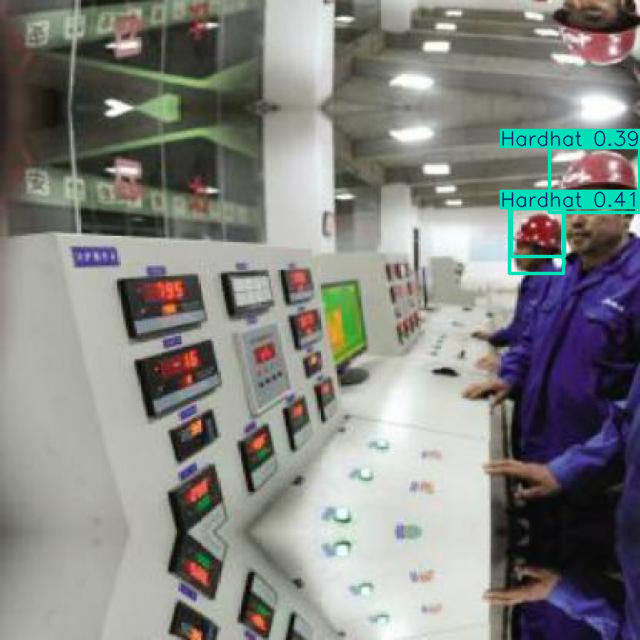

In [38]:
model = YOLO('/content/runs/detect/train16/weights/best.pt')
result = model('/content/ppe-dataset-yolov8/train/images/-1-_png_jpg.rf.56fbd1be279af0461735d8dc2d7e357f.jpg', conf=0.25, save=True)
result[0].show()

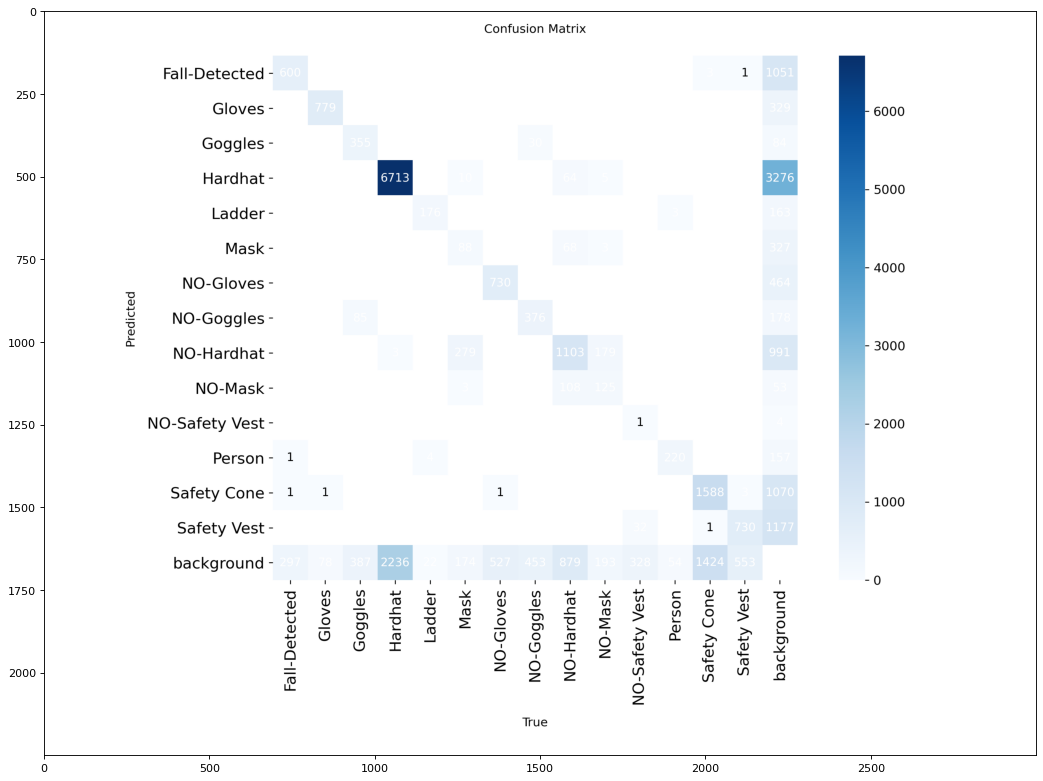

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,13), dpi=80)

plt.imshow(plt.imread('/content/runs/detect/train16/confusion_matrix.png'))

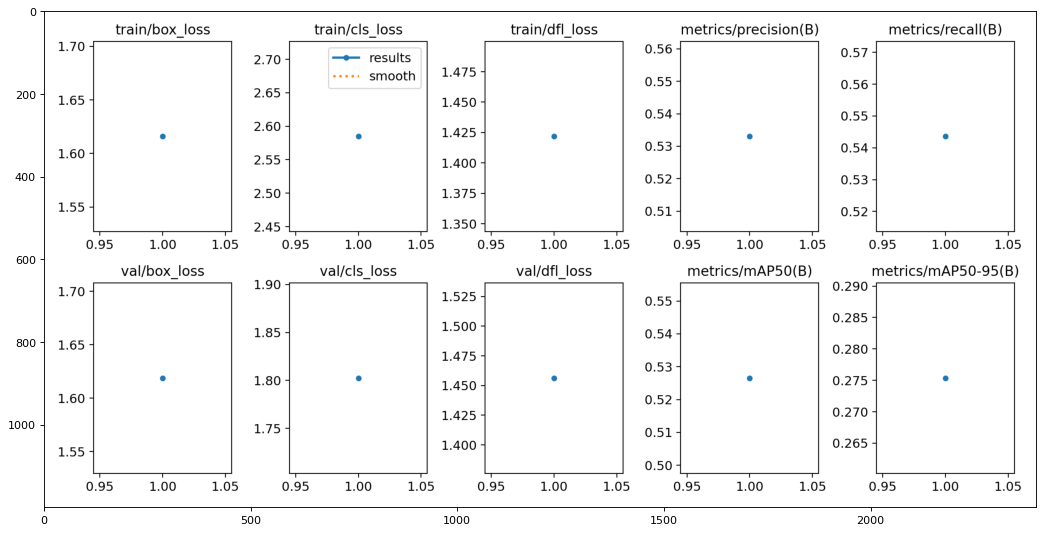

In [41]:
plt.figure(figsize=(16,12 ), dpi=80)

plt.imshow(plt.imread('/content/runs/detect/train16/results.png'))

7
['/content/runs/detect/train16/confusion_matrix.png', '/content/runs/detect/train16/results.png', '/content/runs/detect/train16/F1_curve.png', '/content/runs/detect/train16/confusion_matrix_normalized.png', '/content/runs/detect/train16/R_curve.png', '/content/runs/detect/train16/PR_curve.png', '/content/runs/detect/train16/P_curve.png']


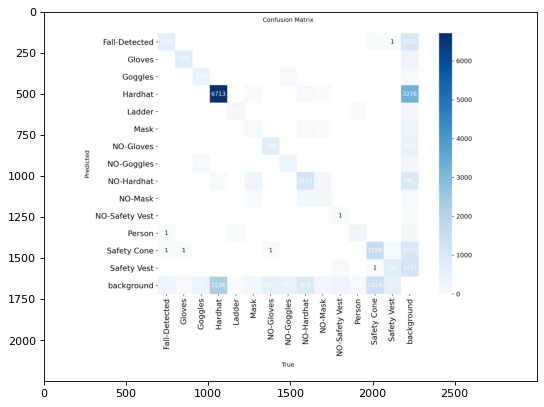

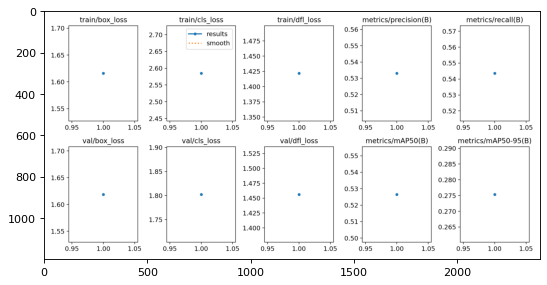

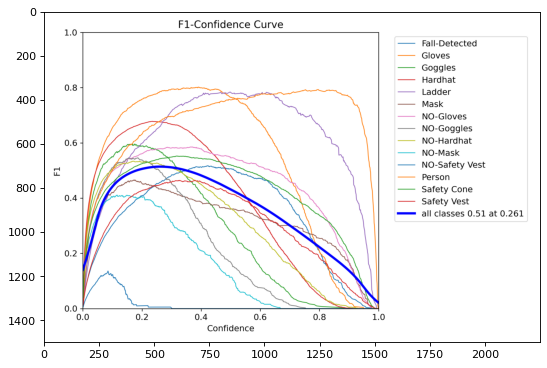

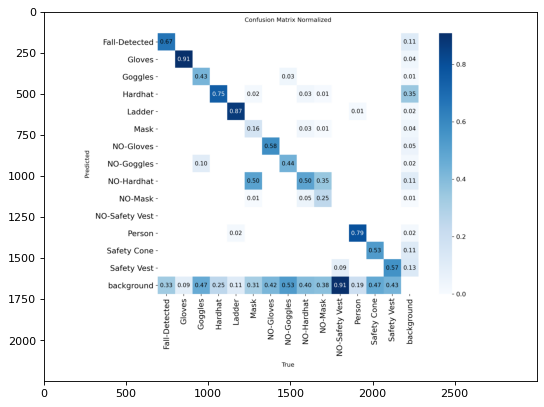

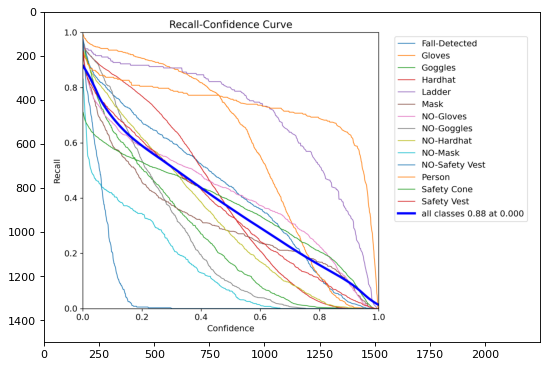

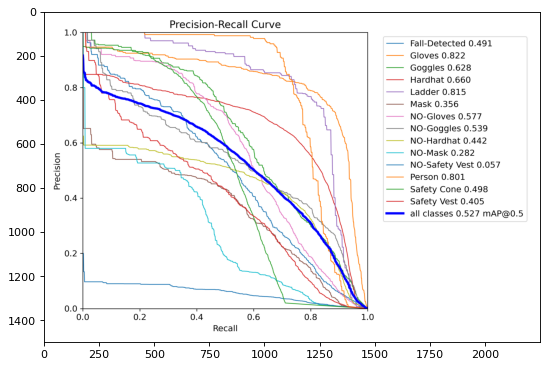

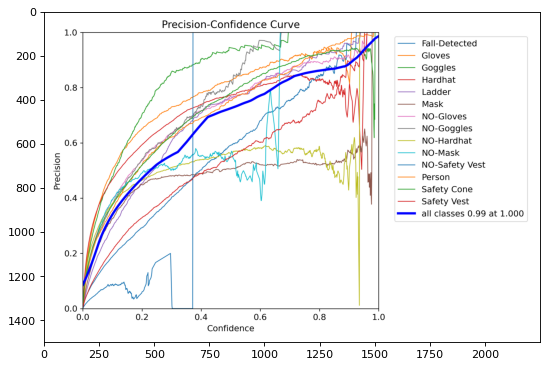

In [42]:
from glob import glob
images = glob('/content/runs/detect/train16/*.png')
print(len(images))
print(images)


for i in images:
  plt.figure(figsize=(8,6), dpi=80)
  plt.imshow(plt.imread(i))


image 1/1 /content/ppe-dataset-yolov8/test/images/-1003-_png_jpg.rf.40a811e60f1b213fd091d11af90ad6e4.jpg: 640x640 3 Hardhats, 8.0ms
Speed: 3.4ms preprocess, 8.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


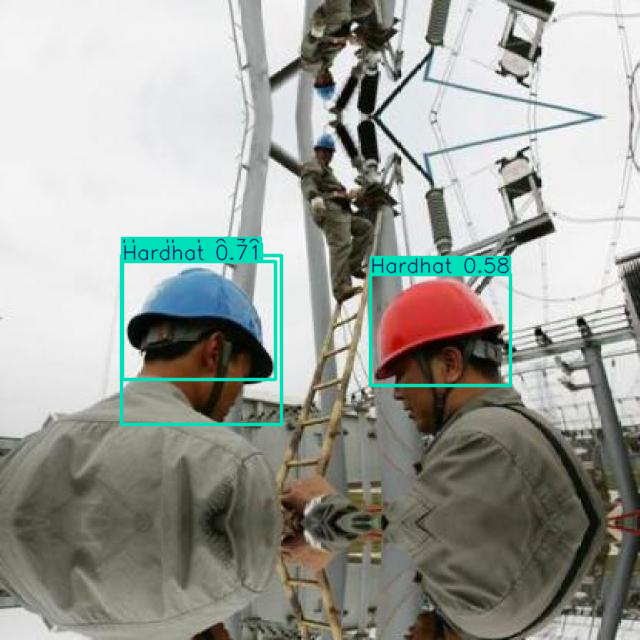

In [43]:
model = YOLO('/content/runs/detect/train16/weights/best.pt')
result = model('/content/ppe-dataset-yolov8/test/images/-1003-_png_jpg.rf.40a811e60f1b213fd091d11af90ad6e4.jpg', conf=0.25, save=True)
result[0].show()


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/4423 /content/ppe-dataset-yolov8/test/images/-1003-_png_jpg.rf.40a811e60f1b213fd091d11af90ad6e4.jpg: 640x640 3 Hardhats, 7.4ms
image 2/4423 /content/ppe-dataset-yolov8/test/images/-1006-_png_jpg.rf.5491519cec0079e60e2aed91c7f1cfae.jpg: 640x640 4 Hardhats, 7.4ms
image 3/4423 /content/ppe-dataset-yolov8/test/images/-1012-_png_jpg.rf.7f210e57ef5776449bd8659c2314fada.jpg: 640x640 2 Hardhats, 7.4ms
image 4/4423 /content/ppe-dataset-yolov8/test/image

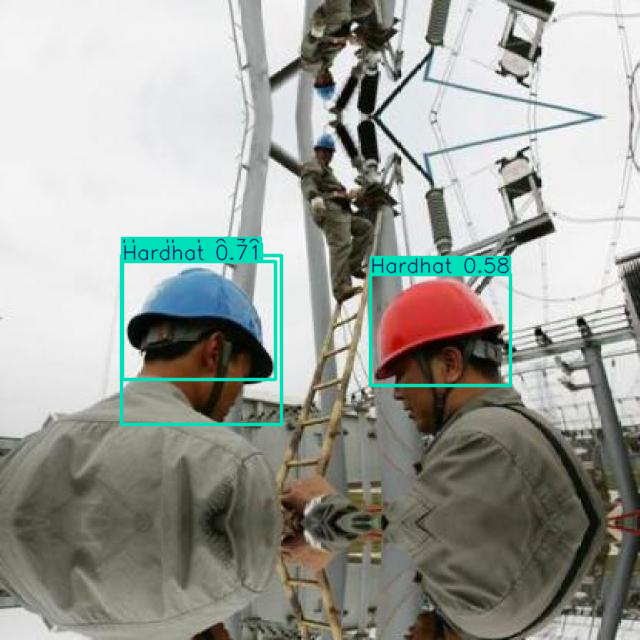

In [45]:
model = YOLO('/content/runs/detect/train16/weights/best.pt')
result = model('/content/ppe-dataset-yolov8/test/images', conf=0.25, save=True)
result[0].show()

In [1]:
import glob
import matplotlib.pyplot as plt

def read_images_from_folder(folder, img_ext):
  images = []

  # Corrected: Call glob.glob directly
  for filename in glob.glob(f"{folder}/*.{img_ext}"):
    img = plt.imread(filename)
    if img is not None:
      images.append(img)
  return images

def sample_images24(images):
  sample = []
  for i in range(24):
    # Corrected a typo in append
    sample.append(images[i])
  return sample

def show_images(images):
  fig = plt.figure(figsize=(16,20))
  columns = 4
  rows = 6
  for i in range(1, columns*rows + 1):
    # Corrected index: Use i-1 to access list elements starting from 0
    img = images[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img) # Pass the image to imshow
    plt.axis('off')
  plt.show()

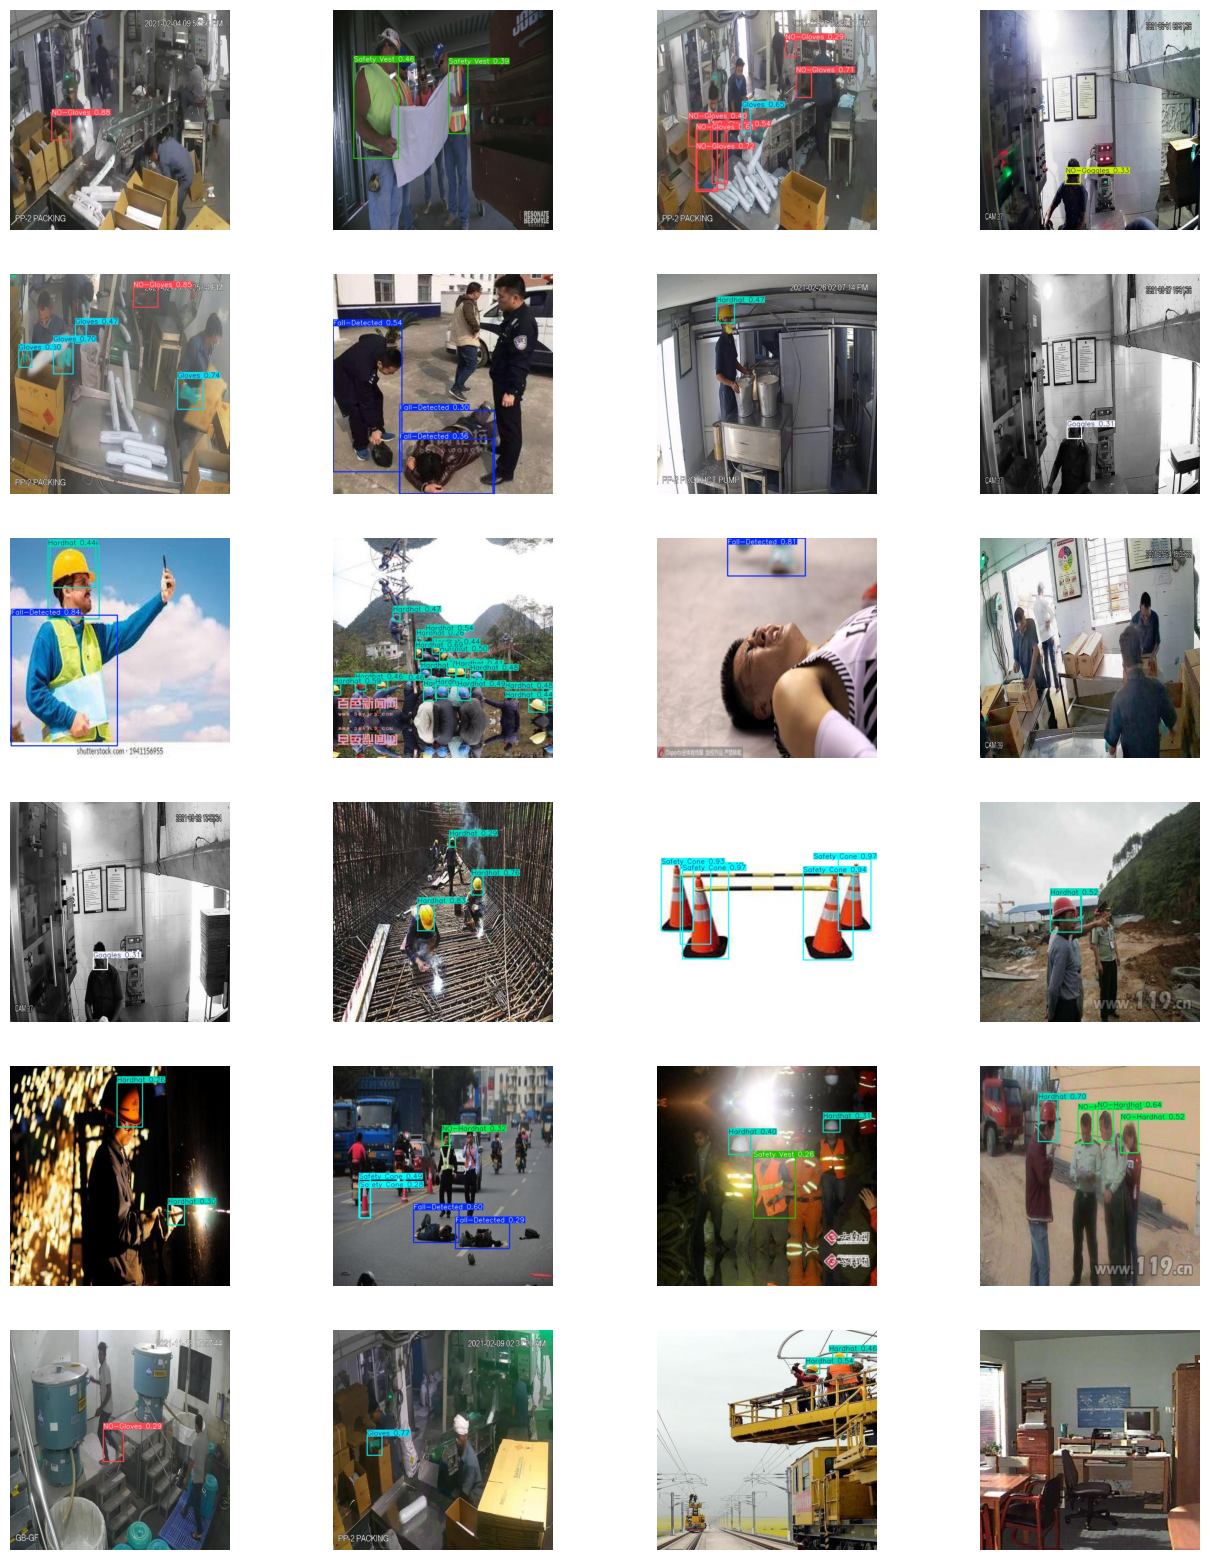

In [2]:
images_val = read_images_from_folder('/content/runs/detect/predict4','jpg')
sample_images = sample_images24(images_val)
show_images(sample_images)